In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color, exposure
from skimage.filters import sobel, gaussian
from skimage.transform import rotate, resize

In [2]:
def show_image(image, title="Image", cmap_type="gray"):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.show()


def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 8), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title("Original")
    ax1.axis("off")
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis("off")


def load_image(path):
    image = plt.imread(path)
    return image

## Edge detection using `sobel()`

#### `sobel()` must be applied on grayscale image


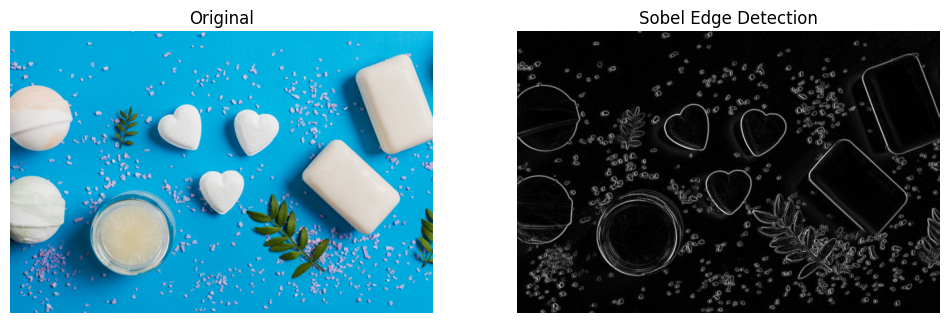

In [3]:
soaps_image = load_image("datasets/1/soap_image.jpg")

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

plot_comparison(soaps_image, edge_sobel, "Sobel Edge Detection")

## Bluring using `gaussian()` filter


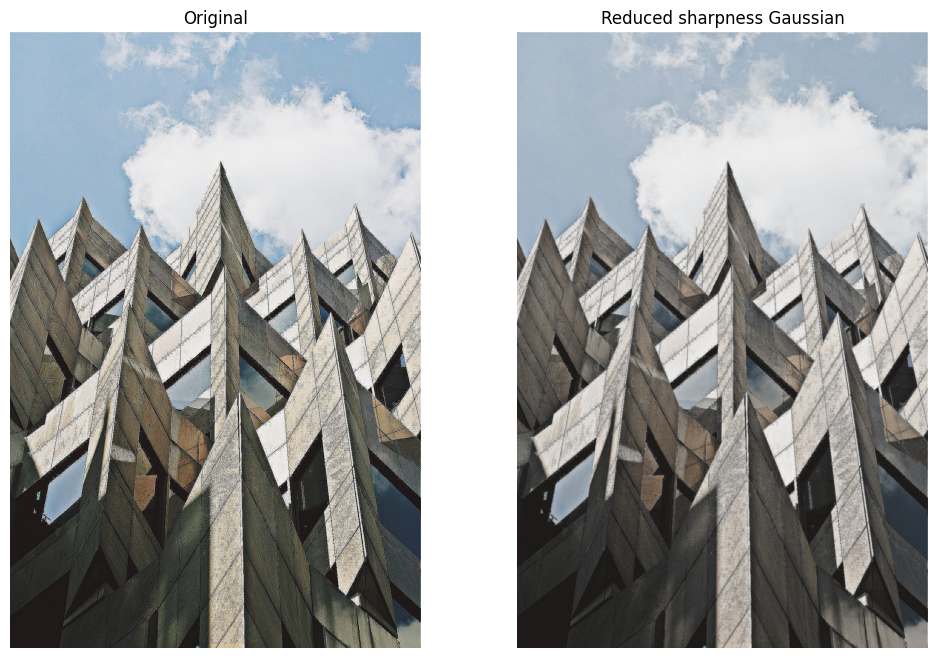

In [4]:
building_image = load_image("datasets/1/building_image.jpg")

# Apply filter
gaussian_image = gaussian(building_image)

# Show original and resulting image to compare
plot_comparison(building_image, gaussian_image, "Reduced sharpness Gaussian")

# Contrast

### Contrast is the difference between the max and min pixel in histogram distribution of an image

#### high contrast (255)

#### low contrast (0)


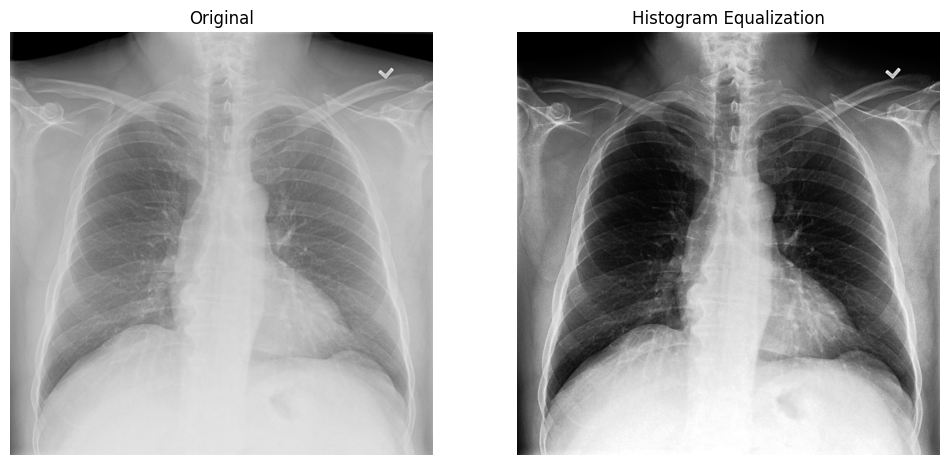

In [5]:
chest_xray_image = load_image("datasets/1/chest_xray_image.png")

# Use histogram equalization to improve the contrast
xray_image_eq = exposure.equalize_hist(chest_xray_image)

plot_comparison(chest_xray_image, xray_image_eq, "Histogram Equalization")

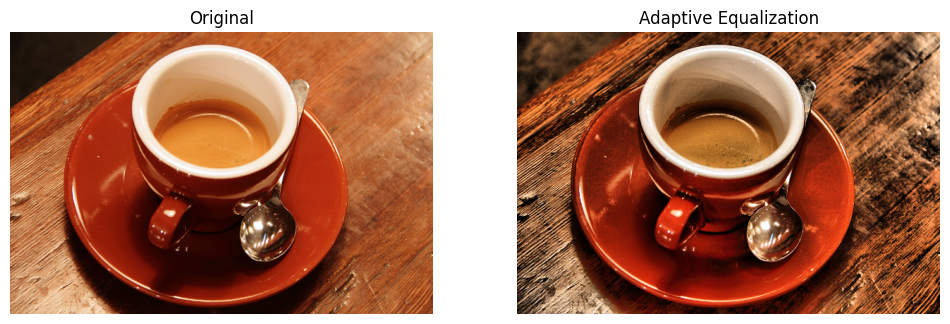

In [6]:
# Load the image
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
plot_comparison(original_image, adapthist_eq_image, "Adaptive Equalization")

# Transformation


## Rotation


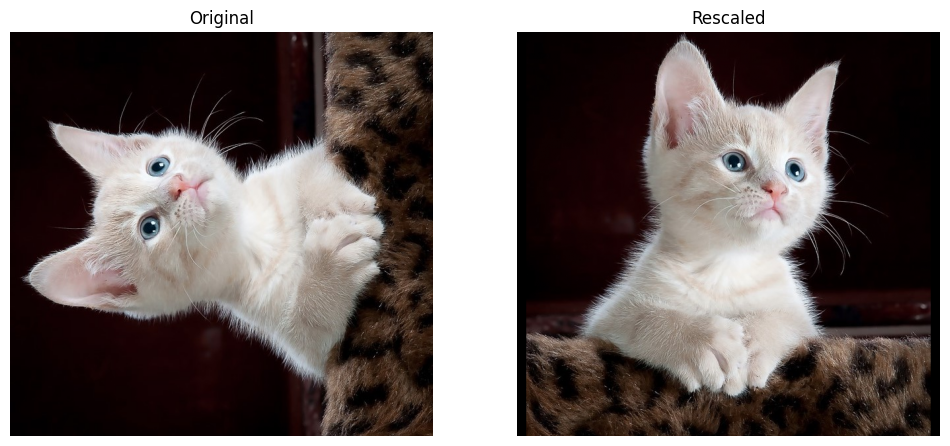

In [7]:
image_cat = load_image("datasets/1/image_cat.jpg")

# Rotate the image 90 degrees clockwise
rotated_cat_image = rotate(image_cat, -90)

# Show the resulting images
plot_comparison(image_cat, rotated_cat_image, "Rescaled")

## Resize


Shape of original image: (423, 640, 3)


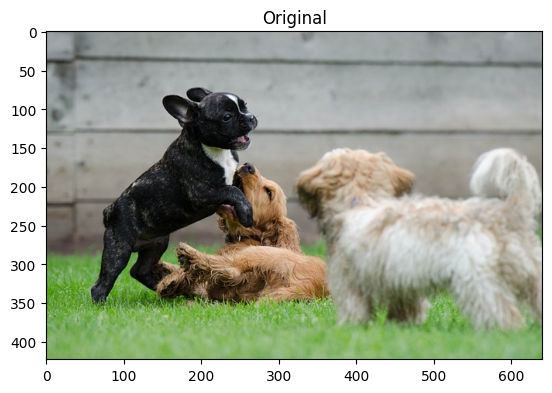

Shape of resized image: (211, 320, 3)


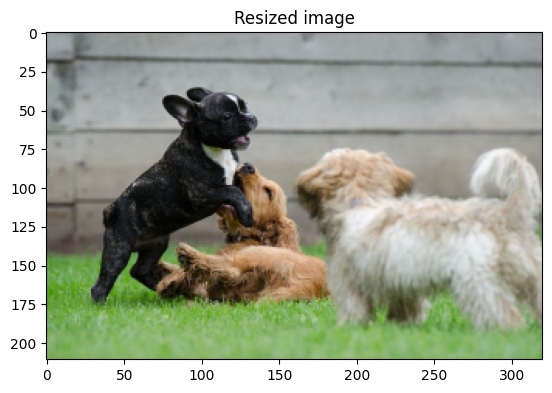

In [8]:
dogs_banner = load_image("datasets/1/dogs_banner.jpg")

# Set proportional height and width so it is half its size
height = int(dogs_banner.shape[0] / 2.0)
width = int(dogs_banner.shape[1] / 2.0)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width), anti_aliasing=True)

# Show the original and resized image
print("Shape of original image: {}".format(dogs_banner.shape))
show_image(dogs_banner, "Original")
print("Shape of resized image: {}".format(image_resized.shape))
show_image(image_resized, "Resized image")